# 1
Find all unique broadcasts in sends.csv. These represent an email or campaign sent to supporters. Use these broadcast identifiers and analyse the transactions data (march.csv,april.csv,may.csv) for these broadcasts. Remember Broadcast Id ↔ Activity Id.

Produce some summary statistics (numbers/timing) and visualisations to represent the numbers/types of transactions for individual broadcasts as well as looking across multiple broadcasts.
Note – The sends data represents email sent in March but transactions based on these sends can
happen in later months.

#### Import + clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.patches as mpatches
import numpy as np

In [2]:
#Import broadcast data
emails = pd.read_csv('sends.csv')
emails.head()

,CAMPAIGNER_ID,BROADCAST_ID
0,qMPJbluhCXQ=,158828
1,BDoflNnPHog=,154395
2,BDoflNnPHog=,157751
3,BDoflNnPHog=,158310
4,BDoflNnPHog=,158828


In [3]:
#Finding unique broadcasts
unique_emails = emails['BROADCAST_ID'].unique()
len(unique_emails)

43

In [4]:
#import transactional data by month
march = pd.read_csv('transactional/march.csv')
april = pd.read_csv('transactional/april.csv')
may = pd.read_csv('transactional/may.csv')

C:\Users\james\AppData\Local\Temp\ipykernel_824\1020435266.py:2: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  march = pd.read_csv('transactional/march.csv')
C:\Users\james\AppData\Local\Temp\ipykernel_824\1020435266.py:3: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  april = pd.read_csv('transactional/april.csv')
C:\Users\james\AppData\Local\Temp\ipykernel_824\1020435266.py:4: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  may = pd.read_csv('transactional/may.csv')


In [5]:
may.head() ##ACTIVITY_DATA_11-25 missing

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,nY8jgGWxUeA=,CA,ETT,2017-05-16 14:51:20,69202,P,Jacques,Chagnon,Westmount-Saint-Louis,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xGowEj2GsF0=,CA,ETT,2017-05-31 11:59:48,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MpbERpuNCk0=,CA,ETT,2017-05-31 08:23:51,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yWg1o0ksoTw=,CA,PET,2017-05-02 08:50:26,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u8zF6BZ07dA=,CAN,ETT,2017-05-12 10:46:56,69202,P,Hélène,David,Outremont,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(march['ACTIVITY_ID'].unique()) 
#seems to be more unique emails on the transactional data than in sends

1007

In [7]:
#Left join unique_emails (send.csv) with all transactional data
#f stands for filtered

marchf= march[march['ACTIVITY_ID'].isin(unique_emails)]
aprilf= april[april['ACTIVITY_ID'].isin(unique_emails)]
mayf= may[may['ACTIVITY_ID'].isin(unique_emails)]

In [8]:
#check size of each dataset
print('lengths')
print(str(len(marchf))+' march')
print(str(len(aprilf))+' april')
print(str(len(mayf))+' may')
marchf.head()

lengths
1435793 march
56360 april
11203 may


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
315532,BDoflNnPHog=,CA,EBC,2017-03-02 09:25:09,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
315533,BDoflNnPHog=,CA,EBC,2017-03-10 09:31:02,158310,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135340,NaN,NaN,NaN,NaN,NaN,NaN
315534,BDoflNnPHog=,CA,EBC,2017-03-13 13:16:19,158828,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135857,NaN,NaN,NaN,NaN,NaN,NaN
315535,5Aia2InAifo=,GBR,EBC,2017-03-06 15:58:08,154395,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#combine all monthly data
monthsf = [marchf, aprilf, mayf]
allmonthsf = pd.concat(monthsf)
#allmonths.head()

In [10]:
#Drop columns that are all NA
allmonthsf=allmonthsf.dropna(axis=1, how='all')
#Drop Data 9 column
allmonthsf=allmonthsf.drop(['ACTIVITY_DATA_9'], axis=1)
#Rename columns for EBC activity type
EBCrename= {'SUPPORTER_ID':'SUPPORTER_ID',	
            'COUNTRY':'COUNTRY',
            'ACTIVITY_TYPE':'ACTIVITY_TYPE',
            'ACTIVITY_DATETIME':'ACTIVITY_DATETIME',
            'ACTIVITY_ID':'ACTIVITY_ID',
            'ACTIVITY_STATUS':'Received', 
            'ACTIVITY_DATA_1':'Opened',
            'ACTIVITY_DATA_2':'Clicked link',
            'ACTIVITY_DATA_3':'Form completed',
            'ACTIVITY_DATA_4':'Hard bounce',
            'ACTIVITY_DATA_5':'Soft bounce',
            'ACTIVITY_DATA_6':'Unsubscribed',
            'ACTIVITY_DATA_7':'Marked as Spam',
            'ACTIVITY_DATA_9':'ACTIVITY_DATA_9'}
allmonthsf.columns = allmonthsf.columns.to_series().map(EBCrename)
#allmonths.describe(include='all')

In [11]:
len(allmonthsf.ACTIVITY_ID.unique()) == len(unique_emails) #no loss of information during join

True

### all data for one broadcast

In [12]:
emailtimes = allmonthsf[allmonthsf['ACTIVITY_ID'] == 154395]
#emailtimes.head()

#### plotting time series for opening selected email

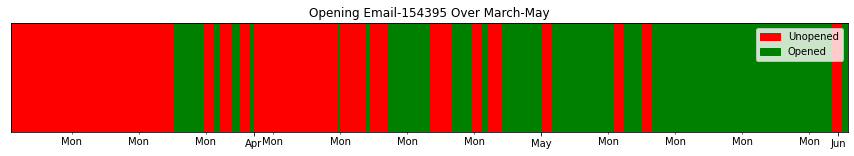

In [13]:
#Setting up time series data
s=emailtimes.set_index('ACTIVITY_DATETIME')['Opened']

fig, ax= plt.subplots(figsize=(15,2))

# plot green for event==1
s1 = s[s == 'open']
inxval = matplotlib.dates.date2num(s1.index)
times= zip(inxval, np.ones(len(s1)))
plt.broken_barh(list(times), (-1,1), color="green")

# plot red for event==0
s2 = s[s != 'open']
inxval = matplotlib.dates.date2num(s2.index)
times= zip(inxval, np.ones(len(s2)))
plt.broken_barh(list(times), (-1,1), color="red")

#format axes
ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=0))
monthFmt = matplotlib.dates.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthFmt)
dayFmt = matplotlib.dates.DateFormatter("%a")
ax.xaxis.set_minor_formatter(dayFmt)
plt.title('Opening Email-154395 Over March-May')
red_patch = mpatches.Patch(color='red', label='Unopened')
green_patch = mpatches.Patch(color='green', label='Opened')
plt.legend(handles=[red_patch, green_patch])
plt.show()
#Seems like emails are more likely to be opened mid-end of month for Mar/April

#### Plot for clicking links was all red, so I increased transparancy for red

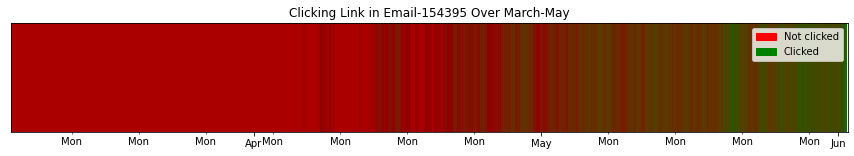

In [14]:
#Setting up time series data
s=emailtimes.set_index('ACTIVITY_DATETIME')['Clicked link']

fig, ax= plt.subplots(figsize=(15,2))

# plot green for event==1
s1 = s[s == 'click']
inxval = matplotlib.dates.date2num(s1.index)
times= zip(inxval, np.ones(len(s1)))
plt.broken_barh(list(times), (-1,1), color="green")

# plot red for event==0
s2 = s[s != 'click']
inxval = matplotlib.dates.date2num(s2.index)
times= zip(inxval, np.ones(len(s2)))
plt.broken_barh(list(times), (-1,1), color="red", alpha=0.01) #had to lower to see

#format axes
ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=0))
monthFmt = matplotlib.dates.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthFmt)
dayFmt = matplotlib.dates.DateFormatter("%a")
ax.xaxis.set_minor_formatter(dayFmt)
plt.title('Clicking Link in Email-154395 Over March-May')
red_patch = mpatches.Patch(color='red', label='Not clicked')
green_patch = mpatches.Patch(color='green', label='Clicked')
plt.legend(handles=[red_patch, green_patch])
plt.show() 
#March is still all red, resolution must not be high enough because 
#if only the green bar was plotted, it's visible
#Weekends tend to have more clicks 

Focusing on March to increase resolution

In [15]:
marchtimes = marchf[marchf['ACTIVITY_ID'] == 154395]

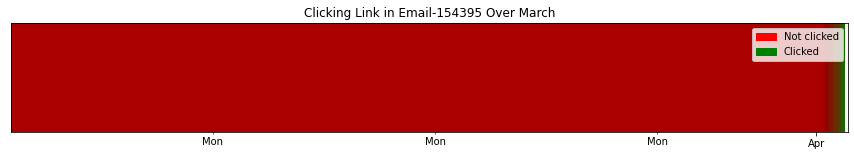

In [16]:
#Setting up time series data
s=marchtimes.set_index('ACTIVITY_DATETIME')['ACTIVITY_DATA_2']

fig, ax= plt.subplots(figsize=(15,2))

# plot green for event==1
s1 = s[s == 'click']
inxval = matplotlib.dates.date2num(s1.index)
times= zip(inxval, np.ones(len(s1)))
plt.broken_barh(list(times), (-1,1), color="green")

# plot red for event==0
s2 = s[s != 'click']
inxval = matplotlib.dates.date2num(s2.index)
times= zip(inxval, np.ones(len(s2)))
plt.broken_barh(list(times), (-1,1), color="red", alpha=0.01) #had to lower to see

#format axes
ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=0))
monthFmt = matplotlib.dates.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthFmt)
dayFmt = matplotlib.dates.DateFormatter("%a")
ax.xaxis.set_minor_formatter(dayFmt)
plt.title('Clicking Link in Email-154395 Over March')
red_patch = mpatches.Patch(color='red', label='Not clicked')
green_patch = mpatches.Patch(color='green', label='Clicked')
plt.legend(handles=[red_patch, green_patch])
plt.show() 

#March is still all red, resolution still must not be high enough 
#In any case, March is the month with lowest frequency of clicking links

## Across all broadcasts

### Count of each metric by ACTIVITY_ID

In [17]:
grouped=allmonthsf.groupby("ACTIVITY_ID").count()
grouped.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,Received,Opened,Clicked link,Form completed,Hard bounce,Soft bounce,Unsubscribed,Marked as Spam
ACTIVITY_ID,,,,,,,,,,,,
154395,266529,266095,266529,266529,266529,264301,76391,72379,1263,435,0,210
157243,266,266,266,266,266,263,0,0,0,2,0,1
157563,75339,75337,75339,75339,75339,75027,10594,479,179,46,379,13
157751,250704,250295,250704,250704,250704,249255,0,0,921,425,0,182
157848,3094,3089,3094,3094,3094,3086,14,3,3,4,5,0


#### Convert above table to percentage table

In [18]:
percent=grouped.copy()
metrics=['Received', 'Opened', 'Clicked link','Form completed',
         'Hard bounce','Soft bounce','Unsubscribed','Marked as Spam']
for col in percent:
    if col in metrics:
        percent[col] = (100. * percent[col] / percent['ACTIVITY_TYPE']).round(2)
    else:
        pass
percent=percent.drop(['COUNTRY', 'ACTIVITY_TYPE', 'ACTIVITY_DATETIME'], axis=1)
percent.rename(columns={'SUPPORTER_ID':'COUNT'}, inplace = True) #Total copies of email sent
percent #Percentage of total copies of email sent for each metric

,COUNT,Received,Opened,Clicked link,Form completed,Hard bounce,Soft bounce,Unsubscribed,Marked as Spam
ACTIVITY_ID,,,,,,,,,
154395,266529,100.0,99.16,28.66,27.16,0.47,0.16,0.00,0.08
157243,266,100.0,98.87,0.00,0.00,0.00,0.75,0.00,0.38
157563,75339,100.0,99.59,14.06,0.64,0.24,0.06,0.50,0.02
157751,250704,100.0,99.42,0.00,0.00,0.37,0.17,0.00,0.07
157848,3094,100.0,99.74,0.45,0.10,0.10,0.13,0.16,0.00
158308,40244,100.0,99.01,4.98,0.82,0.34,0.32,1.36,0.02
158309,50531,100.0,99.16,3.92,1.39,0.40,0.16,1.31,0.08
158310,21798,100.0,99.12,3.84,1.16,0.41,0.10,1.74,0.05
158311,85795,100.0,98.82,4.63,1.34,0.56,0.22,1.61,0.10


### Max values and ACTIVITY_ID of each metric

In [19]:
maxvalues= percent.max()
idxmaxvalues = percent.idxmax()
table=pd.concat([maxvalues, idxmaxvalues], axis=1)
table.rename(columns={0:'Max Value', 1:'ACTIVITY_ID'}, inplace = True)
table

,Max Value,ACTIVITY_ID
COUNT,266529.00,154395
Received,100.00,154395
Opened,100.00,159219
Clicked link,51.52,158822
Form completed,33.45,159229
Hard bounce,12.20,158477
Soft bounce,0.93,159222
Unsubscribed,2.17,162036
Marked as Spam,0.38,157243


### Distribution of ACTIVITY_TYPE

In [20]:
marchf.ACTIVITY_TYPE.value_counts()

EBC    1435793
Name: ACTIVITY_TYPE, dtype: int64

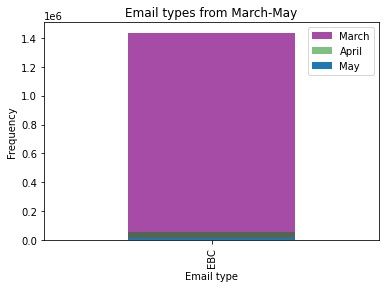

In [21]:
marchf.ACTIVITY_TYPE.value_counts().plot(kind='bar', label='March', color='purple',alpha=0.7)
aprilf.ACTIVITY_TYPE.value_counts().plot(kind='bar', label='April', color='green', alpha=0.5)
mayf.ACTIVITY_TYPE.value_counts().plot(kind='bar', label='May')
plt.title("Email types from March-May")
plt.xlabel("Email type")
plt.ylabel("Frequency")
plt.legend(loc='upper right') #All emails are EBC
plt.show()

## One broadcast

### Plotting metrics for one broadcast (ACTIVITY_ID=154395)

#### removed received/opened since they're all approx 100%

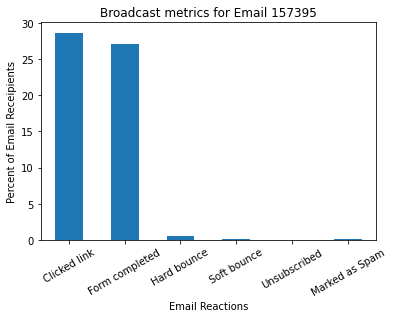

In [22]:
percent.iloc[0, 3:].plot.bar(rot=0)
plt.xticks(rotation=30)
plt.title('Broadcast metrics for Email 157395')
plt.ylabel('Percent of Email Receipients')
plt.xlabel('Email Reactions')
plt.show()

#Almost everyone clicking the link also completed the form
#Should focus on getting people to click the link

### Plotting metrics for one broadcast (ACTIVITY_ID=154243)

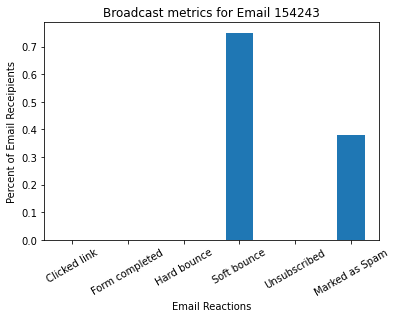

In [23]:
percent.iloc[1, 3:].plot.bar(rot=0)
plt.xticks(rotation=30)
plt.title('Broadcast metrics for Email 154243')
plt.ylabel('Percent of Email Receipients')
plt.xlabel('Email Reactions')
plt.show()

# 2 
Write a function to identify all transactions and sends received by any given supporter. Remember Supporter Id ↔ Campaigner Id.
Choose a single supporter ID and produce summary statistics and/or visualisations.

Skip below cell if already run from part 1

In [24]:
#Import broadcast data
emails = pd.read_csv('sends.csv')
#import transactional data by month
march = pd.read_csv('transactional/march.csv')
april = pd.read_csv('transactional/april.csv')
may = pd.read_csv('transactional/may.csv')

C:\Users\james\AppData\Local\Temp\ipykernel_824\109434439.py:4: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  march = pd.read_csv('transactional/march.csv')
C:\Users\james\AppData\Local\Temp\ipykernel_824\109434439.py:5: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  april = pd.read_csv('transactional/april.csv')
C:\Users\james\AppData\Local\Temp\ipykernel_824\109434439.py:6: DtypeWarning: Columns (9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  may = pd.read_csv('transactional/may.csv')


In [25]:
months = [march, april, may]
allmonths = pd.concat(months)

In [26]:
#emails['CAMPAIGNER_ID'].unique() #seems to be leading whitespace
emails['CAMPAIGNER_ID']= emails['CAMPAIGNER_ID'].str.strip() #Delete whitespace

### Input Campaigner/Supporter ID

In [27]:
campaigner = input('input campaigner/supporter ID: ') #7FcxrYenxomZkArzVWMSmA==

input campaigner/supporter ID: 7FcxrYenxomZkArzVWMSmA==


### Data

In [28]:
if campaigner in emails['CAMPAIGNER_ID'].unique(): 
    sends = emails[emails['CAMPAIGNER_ID']==campaigner]
    print('Sends data')
    #print(sends.head())
    print('Number of unique emails sent: '+str(len(sends.BROADCAST_ID)))
else:
    print('No sends data available for campaigner')

print('\n')
if campaigner in allmonths['SUPPORTER_ID'].unique():
    print('Transactional data')
    transactional = allmonths[allmonths['SUPPORTER_ID']==campaigner]
    #Drop columns that are all NA
    transactional=transactional.dropna(axis=1, how='all')
    #print(transactional.head())
    #print(transactional.describe(include='all'))
    print('Number of unique transactions: '+str(len(transactional)))
else:
    print('No transactional data available for campaigner')

Sends data
Number of unique emails sent: 14


Transactional data
Number of unique transactions: 41


EBC    39
ETT     2
Name: ACTIVITY_TYPE, dtype: int64


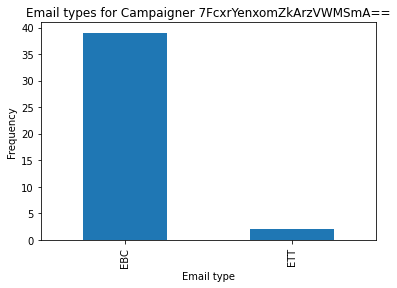

In [29]:
print(transactional.ACTIVITY_TYPE.value_counts())
transactional.ACTIVITY_TYPE.value_counts().plot(kind='bar')
plt.title("Email types for Campaigner " + str(campaigner))
plt.xlabel("Email type")
plt.ylabel("Frequency")
plt.show()
#Add annotations to label the values of the bars later

In [30]:
#Find overlap between broadcasts and transactions
intersectIDs= set(sends.BROADCAST_ID).intersection(transactional['ACTIVITY_ID'])
print('Number of broadcasts with both send and transactional data: ' + str(len(intersectIDs)))
sendtransactions = transactional[transactional['ACTIVITY_ID'].isin(intersectIDs)]

Number of broadcasts with both send and transactional data: 14


In [31]:
transactiongroup=transactional.groupby("ACTIVITY_TYPE").count()
#transactiongroup

Total number of Broadcast Emails Received: 39.0
Received          100.00
Opened            100.00
Clicked link        7.69
Form completed      5.13
Name: EBC, dtype: float64


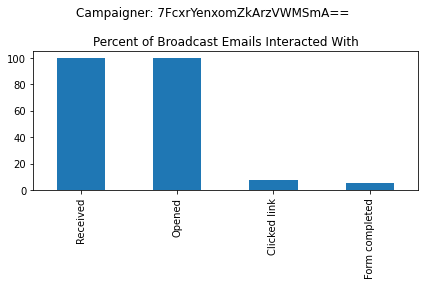

In [32]:
transactiongroup=transactional.groupby("ACTIVITY_TYPE").count()
EBC = transactiongroup.loc["EBC"]
EBC.index = EBC.index.map(EBCrename)
#EBC=EBC.drop(['ACTIVITY_DATA_9'])

metrics=['Received', 'Opened', 'Clicked link','Form completed',
         'Hard bounce','Soft bounce','Unsubscribed','Marked as Spam']
for col in EBC.index:
    if col in metrics:
        EBC.loc[col] = (100. * EBC.loc[col] / EBC.loc['ACTIVITY_ID']).round(2)
    else:
        pass

print('Total number of Broadcast Emails Received: ' + str(EBC.loc['SUPPORTER_ID']))
EBC=EBC.drop(['SUPPORTER_ID', 'COUNTRY', 'ACTIVITY_DATETIME', 'ACTIVITY_ID','ACTIVITY_DATA_9'])
print(EBC)

EBC.plot(kind='bar')
plt.suptitle('Campaigner: ' + str(campaigner))
plt.title('Percent of Broadcast Emails Interacted With')
plt.tight_layout()
plt.show()

In [33]:
EBC2 = transactional[transactional["ACTIVITY_TYPE"]=="EBC"]
EBC2.columns= EBC2.columns.to_series().map(EBCrename)

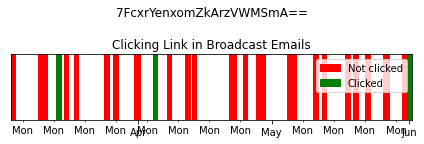

In [34]:
#Setting up time series data
s=EBC2.set_index('ACTIVITY_DATETIME')['Clicked link']

fig, ax= plt.subplots(figsize=(6,2))

# plot green for event==1
s1 = s[s == 'click']
inxval = matplotlib.dates.date2num(s1.index)
times= zip(inxval, np.ones(len(s1)))
plt.broken_barh(list(times), (-1,1), color="green")

# plot red for event==0
s2 = s[s != 'click']
inxval = matplotlib.dates.date2num(s2.index)
times= zip(inxval, np.ones(len(s2)))
plt.broken_barh(list(times), (-1,1), color="red")

#format axes
ax.margins(0)
ax.set_yticks([])
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.WeekdayLocator(byweekday=0))
monthFmt = matplotlib.dates.DateFormatter("%b")
ax.xaxis.set_major_formatter(monthFmt)
dayFmt = matplotlib.dates.DateFormatter("%a")
ax.xaxis.set_minor_formatter(dayFmt)

plt.suptitle(str(campaigner))
plt.title('Clicking Link in Broadcast Emails')
red_patch = mpatches.Patch(color='red', label='Not clicked')
green_patch = mpatches.Patch(color='green', label='Clicked')
plt.legend(handles=[red_patch, green_patch])
plt.tight_layout()
plt.show() 

# 3 
Transactions with Activity Type FUR and FCS represent fundraising (donations) actions for the
client. FUR represents recurring (generally monthly) donations and FCS represents single donations.
Produce analytics for these activities over the three months of data you have (this task is purposely a bit
more open ended).

In [35]:
months = [march, april, may]
allmonths = pd.concat(months)
allmonths.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALJUUgR5fOs=,CAN,ETT,2017-03-20 16:15:17,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nEgT0q6l4MY=,CAN,ETT,2017-03-06 19:15:09,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Getting just FUR and FCS data
filtered= allmonths[(allmonths['ACTIVITY_TYPE'] == "FUR") | (allmonths['ACTIVITY_TYPE'] == "FCS")]
filteredgroup=filtered.groupby("ACTIVITY_TYPE").count()
filteredgroup

,SUPPORTER_ID,COUNTRY,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
ACTIVITY_TYPE,,,,,,,,,,,,,,,,,,,,
FCS,26971,26971,26971,26971,26971,26971,26971,621,26971,26971,26971,26971,0,0,0,26971,26971,26971,26971,26971
FUR,188,188,188,188,188,188,188,66,188,188,188,188,188,188,188,188,188,188,188,188


In [37]:
#Split into FCS and FUR
FCS = filtered[filtered['ACTIVITY_TYPE']=='FCS']
FUR = filtered[filtered['ACTIVITY_TYPE']=='FUR']
FCS.ACTIVITY_STATUS.value_counts()

success    25072
pending     1275
reject       621
refund         3
Name: ACTIVITY_STATUS, dtype: int64

In [38]:
FUR.ACTIVITY_STATUS.value_counts()

success    122
reject      66
Name: ACTIVITY_STATUS, dtype: int64

In [39]:
#Single Contributions Summary Statistics in GBP
FCS.ACTIVITY_DATA_26.describe(include='all')

count    26971.000000
mean        32.281319
std         58.041106
min          0.000000
25%         12.160000
50%         25.000000
75%         35.000000
max       4000.000000
Name: ACTIVITY_DATA_26, dtype: float64

In [40]:
#Recurring Contributions Summary Statistics in GBP
FUR.ACTIVITY_DATA_26.describe(include='all')

count    188.000000
mean       5.742766
std        6.157821
min        0.000000
25%        0.000000
50%        6.170000
75%        6.490000
max       37.410000
Name: ACTIVITY_DATA_26, dtype: float64

### Most Valuable Supporters

In [41]:
editFCS= FCS.drop(FCS[FCS['ACTIVITY_STATUS'] == 'reject'].index)
totalFCS=editFCS.groupby(['SUPPORTER_ID'])['ACTIVITY_DATA_26'].apply(lambda x : x.astype(float).sum())
maxvalues= totalFCS.max()
idxmaxvalues =totalFCS.idxmax()
print("Highest Donation Total (GBP) by Single Contributions from a Single Supporter")
[maxvalues, idxmaxvalues]

Highest Donation Total (GBP) by Single Contributions from a Single Supporter


[4000.0, 'elcE4OOjyDiZkArzVWMSmA==']

In [42]:
#editFCS[editFCS['SUPPORTER_ID'] == 'elcE4OOjyDiZkArzVWMSmA=='] 
##4000 from single donation

In [43]:
#Highest # of Single Contributions Supporter
editFCS['SUPPORTER_ID'].mode()
print('Supporter with Most Single Contributions:')
print(str(editFCS['SUPPORTER_ID'].mode()[0]) + '\n')
print('Number of contributions: ' + str(max(editFCS['SUPPORTER_ID'].value_counts())))

Supporter with Most Single Contributions:
fa1rLIqTJOAqJI2ZMf1z3w==

Number of contributions: 32


In [44]:
#Highest Recurring donation amount
editFUR= FUR.drop(FUR[FUR['ACTIVITY_STATUS'] == 'reject'].index)
totalFUR=editFUR.groupby(['SUPPORTER_ID'])['ACTIVITY_DATA_26'].apply(lambda x : x.astype(float).sum())
maxvalues= totalFUR.max()
idxmaxvalues =totalFUR.idxmax()
print("Highest Recurring Contributions (GBP) from a Single Supporter")
[maxvalues, idxmaxvalues]

Highest Recurring Contributions (GBP) from a Single Supporter


[37.41, 'jg6Uj%2Fymmk%2Bha0eWUOvjsw==']

### Histograms of FCS and FUR Donations

C:\Users\james\AppData\Local\Temp\ipykernel_824\724434396.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(editFCS['ACTIVITY_DATA_26'], 25,
C:\Users\james\AppData\Local\Temp\ipykernel_824\724434396.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(editFCS['ACTIVITY_DATA_26'], 75,


Text(0, 0.5, 'Frequency')

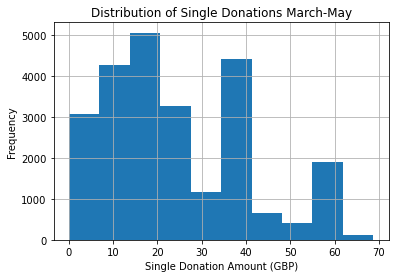

In [45]:
#Find IQR and remove outliers of donations
Q1 = np.percentile(editFCS['ACTIVITY_DATA_26'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(editFCS['ACTIVITY_DATA_26'], 75,
                   interpolation = 'midpoint')
iqr = Q3 - Q1
cut_off = iqr * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
#print(len(filtered[filtered['ACTIVITY_DATA_26'] <lower])) #0
#print(len(filtered[filtered['ACTIVITY_DATA_26'] > upper])) #1977

editFCSiqr = editFCS[(editFCS['ACTIVITY_DATA_26'] > lower) & 
                       (editFCS['ACTIVITY_DATA_26'] < upper)]
#print(len(filterediqr)) #25182
editFCSiqr.hist('ACTIVITY_DATA_26')
plt.title('Distribution of Single Donations March-May')
plt.xlabel('Single Donation Amount (GBP)')
plt.ylabel('Frequency')
#multi-modal, seems like 10-20 and 35-40 are the most popular amounts

C:\Users\james\AppData\Local\Temp\ipykernel_824\1596334974.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(editFUR['ACTIVITY_DATA_26'], 25,
C:\Users\james\AppData\Local\Temp\ipykernel_824\1596334974.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(editFUR['ACTIVITY_DATA_26'], 75,


Text(0, 0.5, 'Frequency')

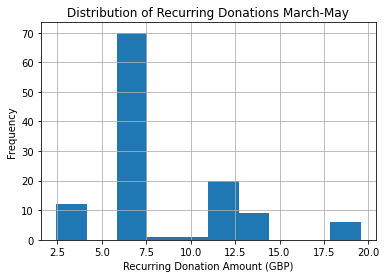

In [46]:
#Find IQR and remove outliers of donations
Q1 = np.percentile(editFUR['ACTIVITY_DATA_26'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(editFUR['ACTIVITY_DATA_26'], 75,
                   interpolation = 'midpoint')
iqr = Q3 - Q1
cut_off = iqr * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off

editFURiqr = editFUR[(editFUR['ACTIVITY_DATA_26'] > lower) & 
                       (editFUR['ACTIVITY_DATA_26'] < upper)]

editFURiqr.hist('ACTIVITY_DATA_26')
plt.title('Distribution of Recurring Donations March-May')
plt.xlabel('Recurring Donation Amount (GBP)')
plt.ylabel('Frequency')
#right-skewed, only 122 data points not inc. outliers removed, so need more data 

### Boxplot for FCS/FUR Donation Amounts

Text(0.5, 1.0, 'Recurring Donation Amount (GBP)')

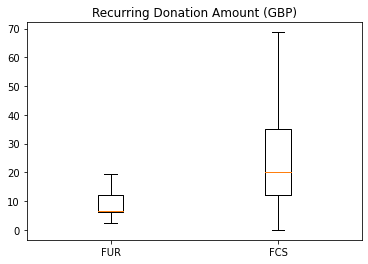

In [47]:
my_dict = {'FUR': editFURiqr.ACTIVITY_DATA_26, 'FCS': editFCSiqr.ACTIVITY_DATA_26}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_title('Recurring Donation Amount (GBP)')
#avg single donations are more than double avg recurring 